In [5]:
# !python3 -m pip install --upgrade pip

In [6]:
# !python3 -m pip install --user xlrd

In [7]:
# !python3 -m pip install --user sklearn

In [8]:
!python3 -m pip install --user seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
!python3 -m pip install --user folium

You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
!python3 -m pip install --user statsmodels

You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:

import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import metrics
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import seaborn as sns
import folium
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm
import math
from sklearn.preprocessing import scale

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, linalg
# Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from math import log
from sklearn import metrics

In [12]:
df_hp = pd.read_excel('kc_house_data.xlsx')
df_hp.describe().astype(np.int64)

,no,id,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,21613,21613,21610,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
mean,10807,4580301520,2014,6,540089,3,2,2079,15106,1,...,7,1788,291,1971,84,98077,47,-122,1986,12768
std,6239,2876565571,0,3,367150,0,0,918,41420,0,...,1,828,442,29,401,53,0,0,685,27304
min,1,1000102,2014,1,75000,0,0,290,520,1,...,1,290,0,1900,0,98001,47,-122,399,651
25%,5404,2123049194,2014,4,321612,3,1,1427,5040,1,...,7,1190,0,1951,0,98033,47,-122,1490,5100
50%,10807,3904930410,2014,6,450000,3,2,1910,7618,1,...,7,1560,0,1975,0,98065,47,-122,1840,7620
75%,16210,7308900445,2015,9,645000,4,2,2550,10688,2,...,8,2210,560,1997,0,98118,47,-122,2360,10083
max,21613,9900000190,2015,12,7700000,33,8,13540,1651359,3,...,13,9410,4820,2015,2015,98199,47,-121,6210,871200


In [13]:
df_hp.isnull()

,no,id,date,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
no               21613 non-null int64
id               21613 non-null int64
date             21613 non-null object
Year             21613 non-null int64
Month            21613 non-null int64
price            21610 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_l

In [15]:
df_hp['bathrooms']=df_hp['bathrooms'].astype(np.int64)
df_hp['floors']=df_hp['floors'].astype(np.int64)
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
no               21613 non-null int64
id               21613 non-null int64
date             21613 non-null object
Year             21613 non-null int64
Month            21613 non-null int64
price            21610 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15

In [16]:
df_hp.dropna(inplace=True)
df_hp.describe().astype(np.int64)

,no,id,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610,...,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610
mean,10808,4579931370,2014,6,540089,3,1,2080,15107,1,...,7,1788,291,1971,84,98077,47,-122,1986,12768
std,6238,2876575494,0,3,367150,0,0,918,41423,0,...,1,828,442,29,401,53,0,0,685,27306
min,1,1000102,2014,1,75000,0,0,290,520,1,...,1,290,0,1900,0,98001,47,-122,399,651
25%,5406,2123049179,2014,4,321612,3,1,1430,5040,1,...,7,1190,0,1951,0,98033,47,-122,1490,5100
50%,10808,3904925745,2014,6,450000,3,2,1910,7617,1,...,7,1560,0,1975,0,98065,47,-122,1840,7620
75%,16210,7308825087,2015,9,645000,4,2,2550,10687,2,...,8,2210,560,1997,0,98118,47,-122,2360,10083
max,21613,9900000190,2015,12,7700000,33,8,13540,1651359,3,...,13,9410,4820,2015,2015,98199,47,-121,6210,871200


In [17]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 24 columns):
no               21610 non-null int64
id               21610 non-null int64
date             21610 non-null object
Year             21610 non-null int64
Month            21610 non-null int64
price            21610 non-null float64
bedrooms         21610 non-null int64
bathrooms        21610 non-null int64
sqft_living      21610 non-null int64
sqft_lot         21610 non-null int64
floors           21610 non-null int64
waterfront       21610 non-null int64
view             21610 non-null int64
condition        21610 non-null int64
grade            21610 non-null int64
sqft_above       21610 non-null int64
sqft_basement    21610 non-null int64
yr_built         21610 non-null int64
yr_renovated     21610 non-null int64
zipcode          21610 non-null int64
lat              21610 non-null float64
long             21610 non-null float64
sqft_living15    21610 non-null int64
sqft_lot15

Text(0.5,1,'house price by count')

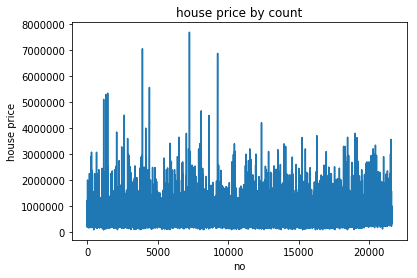

In [18]:
#visualization 1
df_hp_timestamp_trend = df_hp.groupby(['no'])['price'].mean()
df_hp_timestamp_trend.plot()
plt.ylabel('house price')
plt.title('house price by count')

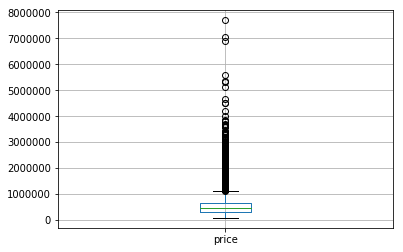

In [19]:
df_hp.boxplot(column='price')

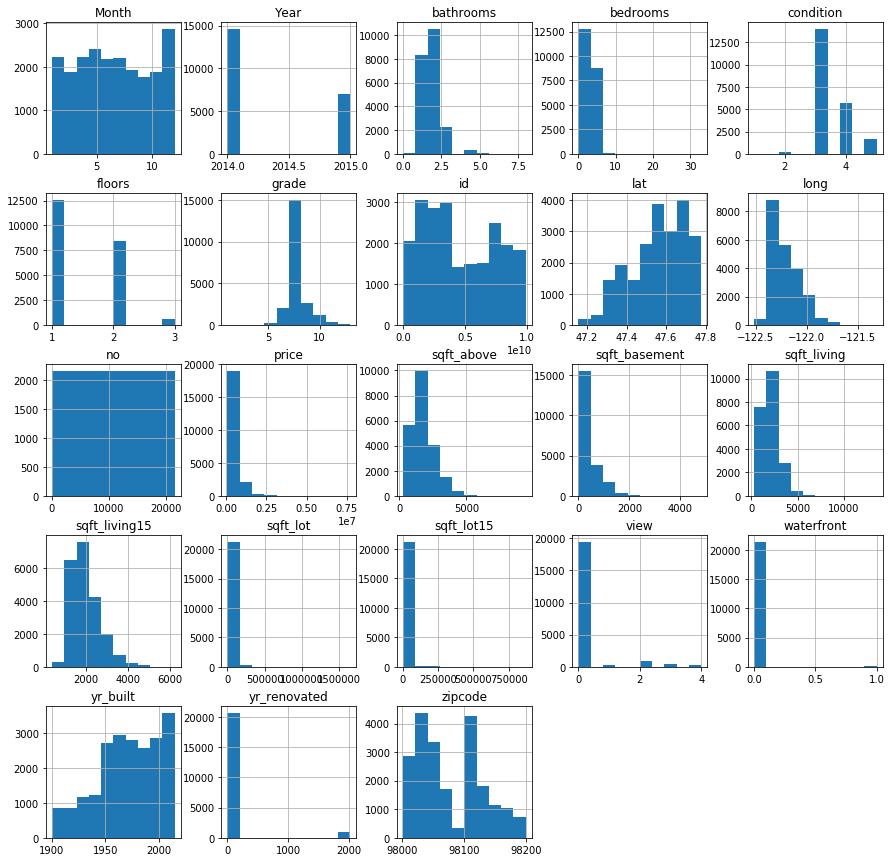

In [20]:
#visualization 3#
df_hp.select_dtypes(include=['int64']).columns
df_hp.hist(figsize=(15,15))
plt.show()

Text(0,0.5,'mean of house price')

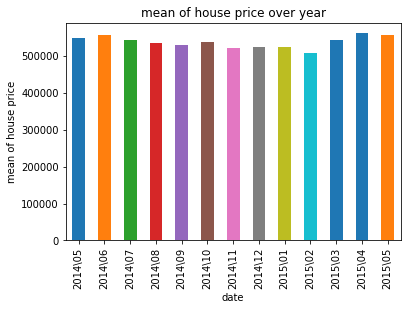

In [21]:
#visualization 4#
df_hp_year = df_hp.groupby(['date'])['price'].mean()
df_hp_year
df_hp_year.plot.bar()
plt.title('mean of house price over year')
plt.ylabel('mean of house price')

In [22]:
df_hp.describe().astype(np.int64)

,no,id,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610,...,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610
mean,10808,4579931370,2014,6,540089,3,1,2080,15107,1,...,7,1788,291,1971,84,98077,47,-122,1986,12768
std,6238,2876575494,0,3,367150,0,0,918,41423,0,...,1,828,442,29,401,53,0,0,685,27306
min,1,1000102,2014,1,75000,0,0,290,520,1,...,1,290,0,1900,0,98001,47,-122,399,651
25%,5406,2123049179,2014,4,321612,3,1,1430,5040,1,...,7,1190,0,1951,0,98033,47,-122,1490,5100
50%,10808,3904925745,2014,6,450000,3,2,1910,7617,1,...,7,1560,0,1975,0,98065,47,-122,1840,7620
75%,16210,7308825087,2015,9,645000,4,2,2550,10687,2,...,8,2210,560,1997,0,98118,47,-122,2360,10083
max,21613,9900000190,2015,12,7700000,33,8,13540,1651359,3,...,13,9410,4820,2015,2015,98199,47,-121,6210,871200


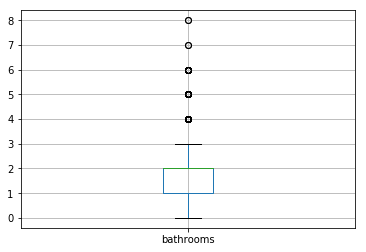

In [23]:
df_hp.boxplot(column='bathrooms')

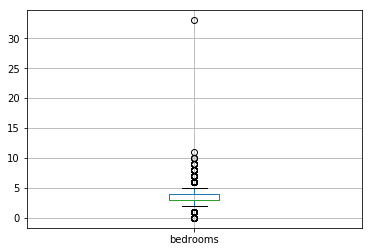

In [24]:
df_hp.boxplot(column='bedrooms')

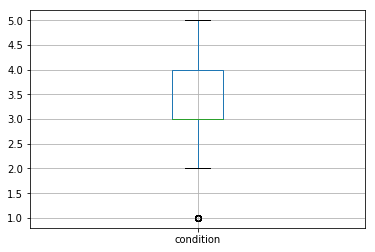

In [25]:
df_hp.boxplot(column='condition')

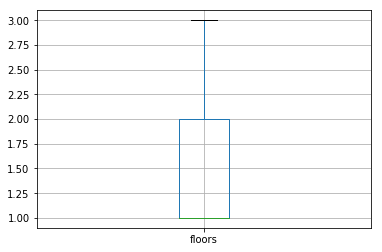

In [26]:
df_hp.boxplot(column='floors')

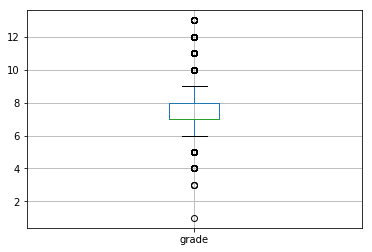

In [27]:
df_hp.boxplot(column='grade')

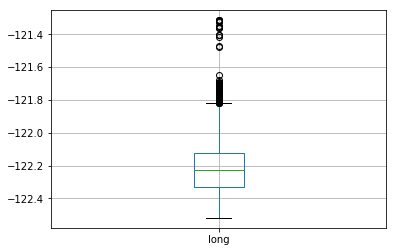

In [28]:
df_hp.boxplot(column='long')

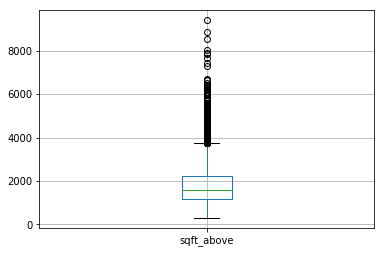

In [29]:
df_hp.boxplot(column='sqft_above')

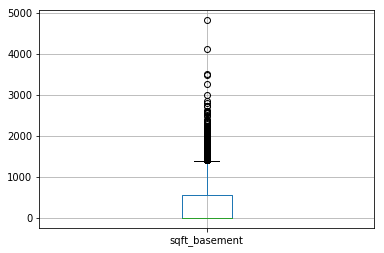

In [30]:
df_hp.boxplot(column='sqft_basement')

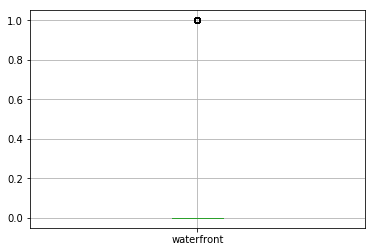

In [31]:
df_hp.boxplot(column='waterfront')

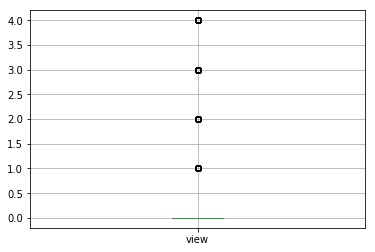

In [32]:
df_hp.boxplot(column='view')

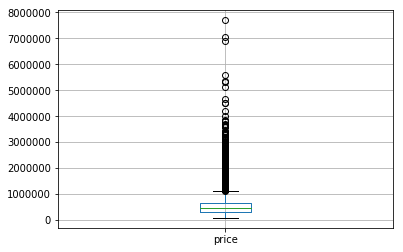

In [33]:
df_hp.boxplot(column='price')

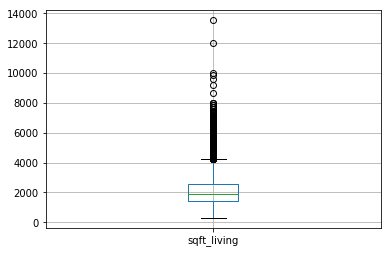

In [34]:
df_hp.boxplot(column='sqft_living')

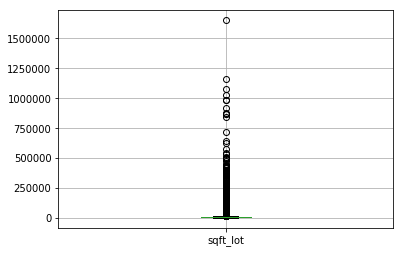

In [35]:
df_hp.boxplot(column='sqft_lot')

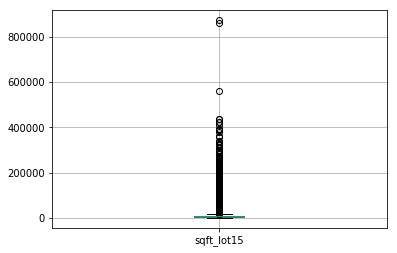

In [36]:
df_hp.boxplot(column='sqft_lot15')

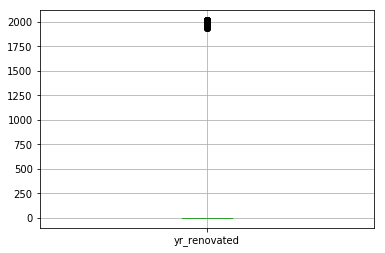

In [37]:
df_hp.boxplot(column='yr_renovated')

In [38]:
#3.3 construct data#
df_hp['basement_present'] = df_hp['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df_hp['basement_present'] = df_hp['basement_present'].astype('category', ordered = False)

df_hp['renovated'] = df_hp['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df_hp['renovated'] = df_hp['renovated'].astype('category', ordered = False)
df_hp.head(10)

,no,id,date,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_present,renovated
0,1,7129300520,2014\10,2014,10,221900.0,3,1,1180,5650,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,2,6414100192,2014\12,2014,12,538000.0,3,2,2570,7242,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,3,5631500400,2015\02,2015,2,180000.0,2,1,770,10000,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,4,2487200875,2014\12,2014,12,604000.0,4,3,1960,5000,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,5,1954400510,2015\02,2015,2,510000.0,3,2,1680,8080,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0
5,6,7237550310,2014\05,2014,5,1225000.0,4,4,5420,101930,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,1,0
6,7,1321400060,2014\06,2014,6,257500.0,3,2,1715,6819,...,0,1995,0,98003,47.3097,-122.327,2238,6819,0,0
7,8,2008000270,2015\01,2015,1,291850.0,3,1,1060,9711,...,0,1963,0,98198,47.4095,-122.315,1650,9711,0,0
8,9,2414600126,2015\04,2015,4,229500.0,3,1,1780,7470,...,730,1960,0,98146,47.5123,-122.337,1780,8113,1,0
9,10,3793500160,2015\03,2015,3,323000.0,3,2,1890,6560,...,0,2003,0,98038,47.3684,-122.031,2390,7570,0,0


In [39]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 26 columns):
no                  21610 non-null int64
id                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610

In [40]:
df_hp['bathrooms']=df_hp['bathrooms'].astype(np.int64)
df_hp['floors']=df_hp['floors'].astype(np.int64)
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 26 columns):
no                  21610 non-null int64
id                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610

In [41]:
df_hp_sub=df_hp.drop(['id'],axis=1)
df_hp = df_hp_sub

In [42]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 25 columns):
no                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610 non-null float64
sqft_living15       216

In [43]:
def get_season(Month):
    if Month < 4:
        return 'winter'
    elif Month < 7:
        return 'spring'
    elif Month < 10:
        return 'summer'
    else:
        return 'autumn'
df_hp.loc[:, 'season'] = df_hp['Month'].apply(get_season)
df_hp.head(100)

,no,date,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_present,renovated,season
0,1,2014\10,2014,10,221900.0,3,1,1180,5650,1,...,1955,0,98178,47.5112,-122.257,1340,5650,0,0,autumn
1,2,2014\12,2014,12,538000.0,3,2,2570,7242,2,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,autumn
2,3,2015\02,2015,2,180000.0,2,1,770,10000,1,...,1933,0,98028,47.7379,-122.233,2720,8062,0,0,winter
3,4,2014\12,2014,12,604000.0,4,3,1960,5000,1,...,1965,0,98136,47.5208,-122.393,1360,5000,1,0,autumn
4,5,2015\02,2015,2,510000.0,3,2,1680,8080,1,...,1987,0,98074,47.6168,-122.045,1800,7503,0,0,winter
5,6,2014\05,2014,5,1225000.0,4,4,5420,101930,1,...,2001,0,98053,47.6561,-122.005,4760,101930,1,0,spring
6,7,2014\06,2014,6,257500.0,3,2,1715,6819,2,...,1995,0,98003,47.3097,-122.327,2238,6819,0,0,spring
7,8,2015\01,2015,1,291850.0,3,1,1060,9711,1,...,1963,0,98198,47.4095,-122.315,1650,9711,0,0,winter
8,9,2015\04,2015,4,229500.0,3,1,1780,7470,1,...,1960,0,98146,47.5123,-122.337,1780,8113,1,0,spring
9,10,2015\03,2015,3,323000.0,3,2,1890,6560,2,...,2003,0,98038,47.3684,-122.031,2390,7570,0,0,winter


In [44]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 26 columns):
no                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610 non-null float64
sqft_living15       216

In [45]:
df_hp['date']=pd.to_datetime(df_hp['date'])
#df_hp['floors']=df_hp['floors'].astype(np.int64)
import time
timestamp = 1.521708e+09
time_local = time.localtime(timestamp)
time_local
# 输出：
# time.struct_time(tm_year=2018, tm_mon=3, tm_mday=22, tm_hour=16, tm_min=40, tm_sec=0, tm_wday=3, tm_yday=81, tm_isdst=0)

time.strftime('%Y/%m/%d %H:%M:%S',time_local)
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 26 columns):
no                  21610 non-null int64
date                21610 non-null datetime64[ns]
Year                21610 non-null int64
Month               21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610 non-null float64
sqft_living15  

In [46]:
def get_Month(season):
    if season is 'spring':
        return '1'
    elif season is 'summer':
        return '2'
    elif season is 'autumn':
        return '3'
    else:
        return '4'
df_hp.loc[:, 'season'] = df_hp['season'].apply(get_Month)

df_hp['season']=df_hp['season'].astype(np.int64)
print(df_hp)
df_hp.info()


          no       date  Year  Month      price  bedrooms  bathrooms  \
0          1 2014-10-01  2014     10   221900.0         3          1   
1          2 2014-12-01  2014     12   538000.0         3          2   
2          3 2015-02-01  2015      2   180000.0         2          1   
3          4 2014-12-01  2014     12   604000.0         4          3   
4          5 2015-02-01  2015      2   510000.0         3          2   
5          6 2014-05-01  2014      5  1225000.0         4          4   
6          7 2014-06-01  2014      6   257500.0         3          2   
7          8 2015-01-01  2015      1   291850.0         3          1   
8          9 2015-04-01  2015      4   229500.0         3          1   
9         10 2015-03-01  2015      3   323000.0         3          2   
10        11 2015-04-01  2015      4   662500.0         3          2   
11        12 2014-05-01  2014      5   468000.0         2          1   
12        13 2014-05-01  2014      5   310000.0         3       

Text(0,0.5,'count')

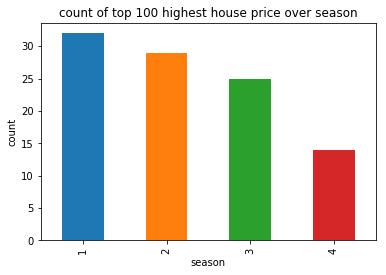

In [47]:
sort = df_hp.sort_values(by='price', ascending=False).head(100)
sort.groupby(['season'])['price'].count().plot.bar()
plt.title('count of top 100 highest house price over season')
plt.xlabel('season')
plt.ylabel('count')

In [48]:
#part 6

In [49]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('BDAS_King House Price Prediction_rwan929').getOrCreate()

In [50]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor

In [51]:
Linear_model_1 = LinearRegression(regParam=0, maxIter=100, labelCol='price')
Linear_model_2 = LinearRegression(regParam=1, maxIter=100, labelCol='price')
Linear_model_3 = LinearRegression(regParam=0, maxIter=200, labelCol='price')

In [52]:
random_forest_model_1 = RandomForestRegressor(numTrees=5, impurity='gini', labelCol='price')
random_forest_model_2 = RandomForestRegressor(numTrees=10, impurity='gini', labelCol='price')
random_forest_model_3 = RandomForestRegressor(numTrees=5, impurity='entropy', labelCol='price')

In [53]:
#part 7

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [126]:
df_hp_pyspark = spark.createDataFrame(df_hp)

In [127]:
print(type(df_hp))
print(type(df_hp_pyspark))
print(df_hp_pyspark.columns)
df_hp_pyspark.printSchema()

<class 'pandas.core.frame.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
['no', 'date', 'Year', 'Month', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present', 'renovated', 'season']
root
 |-- no: long (nullable = true)
 |-- date: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- price: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- view: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- grade: long (nullable = true)
 |-- sqft_above: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- yr_built:

In [128]:
from pyspark.ml.feature import VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer

In [129]:
gender_indexer = StringIndexer(inputCol='basement_present',outputCol='basement_presentIndex')
gender_encoder = OneHotEncoder(inputCol='basement_presentIndex',outputCol='basement_presentVec')
cholesterol_index = StringIndexer(inputCol='renovated', outputCol='renovatedIndex')
cholesterol_encoder = OneHotEncoder(inputCol='renovatedIndex', outputCol='renovatedVec')
#gluc_indexer = StringIndexer(inputCol='new_gluc', outputCol='glucIndex')
#gluc_encoder = OneHotEncoder(inputCol='glucIndex', outputCol='glucVec')

In [130]:
assembler = VectorAssembler(inputCols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15'
], outputCol='features')

In [131]:
df_hp_pyspark = gender_indexer.fit(df_hp_pyspark).transform(df_hp_pyspark)
df_hp_pyspark = gender_encoder.transform(df_hp_pyspark)

df_hp_pyspark = cholesterol_index.fit(df_hp_pyspark).transform(df_hp_pyspark)
df_hp_pyspark = cholesterol_encoder.transform(df_hp_pyspark)

#cardio_data_pyspark = gluc_indexer.fit(cardio_data_pyspark).transform(cardio_data_pyspark)
#cardio_data_pyspark = gluc_encoder.transform(cardio_data_pyspark)

df_hp_pyspark = assembler.transform(df_hp_pyspark)

In [132]:
df_hp_pyspark.columns

['no',
 'date',
 'Year',
 'Month',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'basement_present',
 'renovated',
 'season',
 'basement_presentIndex',
 'basement_presentVec',
 'renovatedIndex',
 'renovatedVec',
 'features']

In [133]:

train_data, test_data = df_hp_pyspark.randomSplit([0.8,.2])

In [134]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
# import findspark
# findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
# import pyspark
# from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_docs').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression

In [135]:
# Visualise the training data format.
train_data.show()
test_data.show()

+---+-------------------+----+-----+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+----------------+---------+------+---------------------+-------------------+--------------+-------------+--------------------+
| no|               date|Year|Month|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|basement_present|renovated|season|basement_presentIndex|basement_presentVec|renovatedIndex| renovatedVec|            features|
+---+-------------------+----+-----+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+----------------+---------+------+---------------------+-------------------+----

+---+-------------------+----+-----+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+----------------+---------+------+---------------------+-------------------+--------------+-------------+--------------------+
| no|               date|Year|Month|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|basement_present|renovated|season|basement_presentIndex|basement_presentVec|renovatedIndex| renovatedVec|            features|
+---+-------------------+----+-----+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+----------------+---------+------+---------------------+-------------------+----

In [136]:
#Multiple Regression-all features

In [137]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('multiple_linear_regression2').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [138]:
df_hp_sub_spark3 = spark.createDataFrame(df_hp_sub)

In [139]:
df_hp_sub_spark3.printSchema()
df_hp_sub_spark3.head()

root
 |-- no: long (nullable = true)
 |-- date: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- price: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- view: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- grade: long (nullable = true)
 |-- sqft_above: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- yr_built: long (nullable = true)
 |-- yr_renovated: long (nullable = true)
 |-- zipcode: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: long (nullable = true)
 |-- sqft_lot15: long (nullable = true)
 |-- basement_present: long (nullable = true)
 |-- renovated: long (nullable = true)
 |-- season: long (nullable = true)



Row(no=1, date=1412121600000000000, Year=2014, Month=10, price=221900.0, bedrooms=3, bathrooms=1, sqft_living=1180, sqft_lot=5650, floors=1, waterfront=0, view=0, condition=3, grade=7, sqft_above=1180, sqft_basement=0, yr_built=1955, yr_renovated=0, zipcode=98178, lat=47.5112, long=-122.257, sqft_living15=1340, sqft_lot15=5650, basement_present=0, renovated=0, season=3)

In [140]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15'],
    outputCol="features")

In [141]:
output3 = assembler.transform(df_hp_sub_spark3)

In [142]:
final_data3 = output3.select("features",'price')
final_data3.show()

+--------------------+---------+
|            features|    price|
+--------------------+---------+
|[3.0,1.0,1180.0,5...| 221900.0|
|[3.0,2.0,2570.0,7...| 538000.0|
|[2.0,1.0,770.0,10...| 180000.0|
|[4.0,3.0,1960.0,5...| 604000.0|
|[3.0,2.0,1680.0,8...| 510000.0|
|[4.0,4.0,5420.0,1...|1225000.0|
|[3.0,2.0,1715.0,6...| 257500.0|
|[3.0,1.0,1060.0,9...| 291850.0|
|[3.0,1.0,1780.0,7...| 229500.0|
|[3.0,2.0,1890.0,6...| 323000.0|
|[3.0,2.0,3560.0,9...| 662500.0|
|[2.0,1.0,1160.0,6...| 468000.0|
|[3.0,1.0,1430.0,1...| 310000.0|
|[5.0,2.0,1810.0,4...| 530000.0|
|[4.0,3.0,2950.0,5...| 650000.0|
|[3.0,2.0,1890.0,1...| 395000.0|
|[4.0,1.0,1600.0,4...| 485000.0|
|[2.0,1.0,1200.0,9...| 189000.0|
|[3.0,1.0,1250.0,9...| 230000.0|
|[4.0,1.0,1620.0,4...| 385000.0|
+--------------------+---------+
only showing top 20 rows



In [143]:
train_data,test_data = final_data3.randomSplit([0.8,0.2])

In [144]:
lr3 = LinearRegression(labelCol='price')

In [145]:
lrModel3 = lr3.fit(train_data)

In [146]:
print("Coefficients: {} Intercept: {}".format(lrModel3.coefficients,lrModel3.intercept))

Coefficients: [-36332.181894779445,53323.21829315267,88.1763180443239,0.12947957739622923,-1840.3551495476215,536770.9651751013,55281.347634308084,27273.477573866254,96817.86045266113,91.4272202117867,58.16848230970902,-2569.363746939117,11.821051055366945,-597.6058892007474,604616.477307277,-211578.31258291652,21.970257603968147,-0.42227485197769393] Intercept: 8378579.2920976635


In [147]:
test_results = lrModel3.evaluate(test_data)

In [148]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 200988.57680116312


In [149]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.705892320488865


In [150]:
#Multiple Regression-selected features

In [151]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Mutiple_linear_regression1').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [152]:
df_hp_sub_spark2 = spark.createDataFrame(df_hp_sub)

In [153]:
df_hp_sub_spark2.printSchema()
df_hp_sub_spark2.head()

root
 |-- no: long (nullable = true)
 |-- date: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- price: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- view: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- grade: long (nullable = true)
 |-- sqft_above: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- yr_built: long (nullable = true)
 |-- yr_renovated: long (nullable = true)
 |-- zipcode: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: long (nullable = true)
 |-- sqft_lot15: long (nullable = true)
 |-- basement_present: long (nullable = true)
 |-- renovated: long (nullable = true)
 |-- season: long (nullable = true)



Row(no=1, date=1412121600000000000, Year=2014, Month=10, price=221900.0, bedrooms=3, bathrooms=1, sqft_living=1180, sqft_lot=5650, floors=1, waterfront=0, view=0, condition=3, grade=7, sqft_above=1180, sqft_basement=0, yr_built=1955, yr_renovated=0, zipcode=98178, lat=47.5112, long=-122.257, sqft_living15=1340, sqft_lot15=5650, basement_present=0, renovated=0, season=3)

In [154]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [155]:
assembler = VectorAssembler(
    inputCols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode'],
    outputCol="features")

In [156]:
output2 = assembler.transform(df_hp_sub_spark2)

In [157]:
final_data2 = output2.select("features",'price')
final_data2.show()

+--------------------+---------+
|            features|    price|
+--------------------+---------+
|[3.0,1.0,1180.0,5...| 221900.0|
|[3.0,2.0,2570.0,7...| 538000.0|
|[2.0,1.0,770.0,10...| 180000.0|
|[4.0,3.0,1960.0,5...| 604000.0|
|[3.0,2.0,1680.0,8...| 510000.0|
|[4.0,4.0,5420.0,1...|1225000.0|
|[3.0,2.0,1715.0,6...| 257500.0|
|[3.0,1.0,1060.0,9...| 291850.0|
|[3.0,1.0,1780.0,7...| 229500.0|
|[3.0,2.0,1890.0,6...| 323000.0|
|[3.0,2.0,3560.0,9...| 662500.0|
|[2.0,1.0,1160.0,6...| 468000.0|
|[3.0,1.0,1430.0,1...| 310000.0|
|[5.0,2.0,1810.0,4...| 530000.0|
|[4.0,3.0,2950.0,5...| 650000.0|
|[3.0,2.0,1890.0,1...| 395000.0|
|[4.0,1.0,1600.0,4...| 485000.0|
|[2.0,1.0,1200.0,9...| 189000.0|
|[3.0,1.0,1250.0,9...| 230000.0|
|[4.0,1.0,1620.0,4...| 385000.0|
+--------------------+---------+
only showing top 20 rows



In [158]:
train_data,test_data = final_data2.randomSplit([0.8,0.2])

In [159]:
lr2 = LinearRegression(labelCol='price')

In [160]:
lrModel2 = lr2.fit(train_data)

In [161]:
print("Coefficients: {} Intercept: {}".format(lrModel2.coefficients,lrModel2.intercept))

Coefficients: [-62056.74338657313,37543.141195023825,315.36295031665173,-0.30993575520976785,-29232.54129325363,579.7132110649529] Intercept: -56782114.19772564


In [162]:
test_results = lrModel2.evaluate(test_data)

In [163]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 239953.11278070055


In [164]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.5053349169471195


In [165]:
#random forest

In [166]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('random_forest1').getOrCreate()

In [167]:
df_hp_pyspark1 = spark.createDataFrame(df_hp)

In [168]:
# A few things we need to do before Spark can accept the data!
# It needs to be in the form of two columns: "label" and "features".Q
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [169]:
assembler = VectorAssembler(inputCols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15'
], outputCol='features')

In [170]:
train_data,test_data = df_hp_pyspark1.randomSplit([0.8,0.2])

In [171]:
# Train a RandomForest model.
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
#featureIndexer =VectorIndexer(inputCol="features", outputCol="indexedFeatures")

# Split the data into training and test sets (30% held out for testing)
# (trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="features",labelCol="price")

# Chain indexer and forest in a Pipeline
#pipeline = Pipeline(stages=[featureIndexer, rf])
pipeline = Pipeline(stages=[assembler, rf])
# Train model.  This also runs the indexer.
model = pipeline.fit(train_data)

# Make predictions.
predictions = model.transform(test_data)

# Select example rows to display.
predictions.select("prediction", "price", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator1 = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator1.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
evaluator2 = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluator2.evaluate(predictions)
print("R-square (R2) on test data = %g" % r2)
rfModel = model.stages[1]
print(rfModel)  # summary only



+------------------+--------+--------------------+
|        prediction|   price|            features|
+------------------+--------+--------------------+
|285507.67939216277|221900.0|[3.0,1.0,1180.0,5...|
|  563108.523824271|538000.0|[3.0,2.0,2570.0,7...|
| 517900.6828018306|510000.0|[3.0,2.0,1680.0,8...|
| 311597.9266608038|229500.0|[3.0,1.0,1780.0,7...|
| 415008.5813656392|468000.0|[2.0,1.0,1160.0,6...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 185374
R-square (R2) on test data = 0.760244
RandomForestRegressionModel (uid=rfr_931f23e19e4d) with 20 trees


In [172]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('simple_linear_regression').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [173]:
df_hp_sub_spark1 = spark.createDataFrame(df_hp_sub)

In [174]:
df_hp_sub_spark1.printSchema()

root
 |-- no: long (nullable = true)
 |-- date: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- price: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- view: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- grade: long (nullable = true)
 |-- sqft_above: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- yr_built: long (nullable = true)
 |-- yr_renovated: long (nullable = true)
 |-- zipcode: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: long (nullable = true)
 |-- sqft_lot15: long (nullable = true)
 |-- basement_present: long (nullable = true)
 |-- renovated: long (nullable = true)
 |-- season: long (nullable = true)



In [175]:
#simple linear regression

In [176]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [177]:
assembler = VectorAssembler(
    inputCols=["sqft_living"],
    outputCol="features")

In [178]:
output1 = assembler.transform(df_hp_sub_spark1)

In [179]:
final_data1 = output1.select("features",'price')
final_data1.show()

+--------+---------+
|features|    price|
+--------+---------+
|[1180.0]| 221900.0|
|[2570.0]| 538000.0|
| [770.0]| 180000.0|
|[1960.0]| 604000.0|
|[1680.0]| 510000.0|
|[5420.0]|1225000.0|
|[1715.0]| 257500.0|
|[1060.0]| 291850.0|
|[1780.0]| 229500.0|
|[1890.0]| 323000.0|
|[3560.0]| 662500.0|
|[1160.0]| 468000.0|
|[1430.0]| 310000.0|
|[1810.0]| 530000.0|
|[2950.0]| 650000.0|
|[1890.0]| 395000.0|
|[1600.0]| 485000.0|
|[1200.0]| 189000.0|
|[1250.0]| 230000.0|
|[1620.0]| 385000.0|
+--------+---------+
only showing top 20 rows



In [180]:
train_data,test_data = final_data1.randomSplit([0.8,0.2])

In [181]:
lr1 = LinearRegression(labelCol='price')

In [182]:
lrModel1 = lr1.fit(train_data)

In [183]:
print("Coefficients: {} Intercept: {}".format(lrModel1.coefficients,lrModel1.intercept))

Coefficients: [282.6066081357386] Intercept: -47095.35499901754


In [184]:
test_results = lrModel1.evaluate(test_data)

In [185]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 256112.5245698326


In [186]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.4824623238849467


Text(0,0.5,'count')

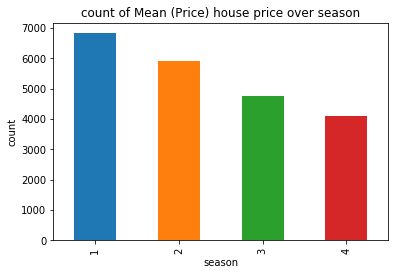

In [187]:
sort = df_hp.sort_values(by='price', ascending=False)
sort.groupby(['season'])['price'].count().plot.bar()
plt.title('count of Mean (Price) house price over season')
plt.xlabel('season')
plt.ylabel('count')

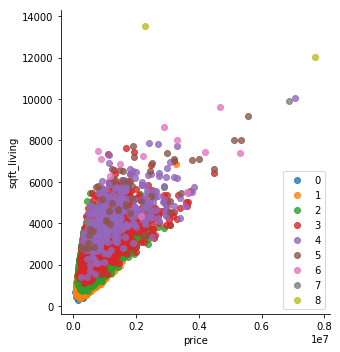

In [188]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="price", y="sqft_living", data=df_hp, fit_reg=False, hue='bathrooms', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 

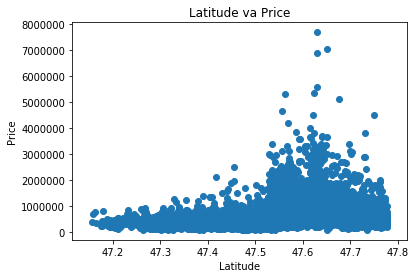

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [189]:
plt.scatter(df_hp.lat, df_hp.price)
plt.title("Latitude va Price")
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()
sns.despine

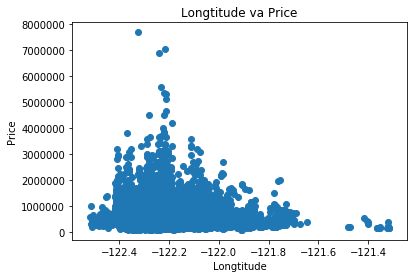

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [190]:
plt.scatter(df_hp.long, df_hp.price)
plt.title("Longtitude va Price")
plt.xlabel('Longtitude')
plt.ylabel('Price')
plt.show()
sns.despine

In [191]:
# find the row of the house which has the highest price
maxpr=df_hp.loc[df_hp['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_hp_copy = df_hp.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_hp_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_hp_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

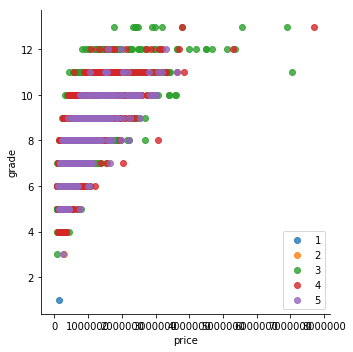

In [192]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="price", y="grade", data=df_hp, fit_reg=False, hue='condition', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 

Text(0,0.5,'price')

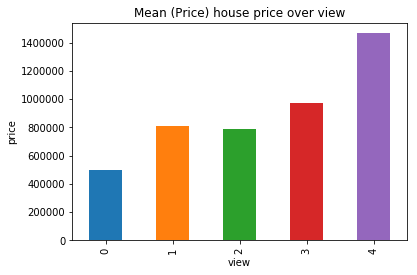

In [193]:
sort = df_hp.sort_values(by='price', ascending=False)
sort.groupby(['view'])['price'].mean().plot.bar()
plt.title('Mean (Price) house price over view')
plt.xlabel('view')
plt.ylabel('price')

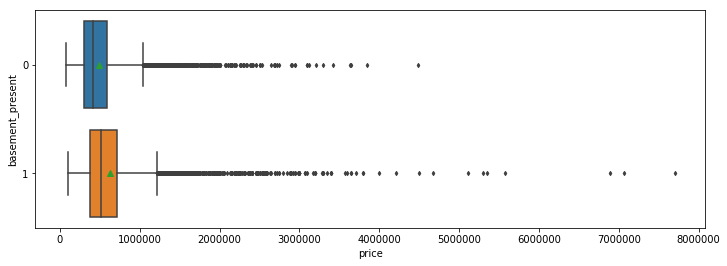

In [194]:
# variable basement_present
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'basement_present', x = 'price', data = df_hp, width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
#r, p = stats.pointbiserialr(df_hp['basement_present'], df_hp['price'])
#print ('point biserial correlation r between price and presence_of_basement is %s with p = %s' %(r,p))

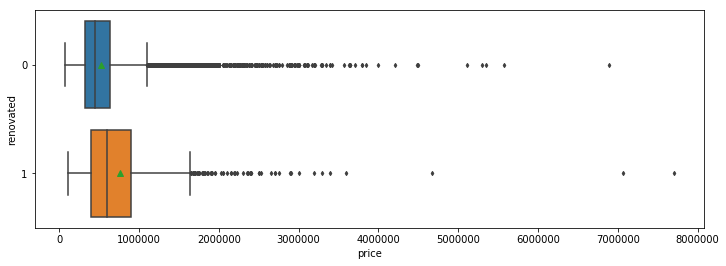

point biserial correlation r between price and presence_of_renovation is 0.12608654527015484 with p = 2.747850230901494e-77


In [195]:
#variable 'renovated'
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'renovated', x = 'price', data = df_hp,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(df_hp['renovated'], df_hp['price'])
print ('point biserial correlation r between price and presence_of_renovation is %s with p = %s' %(r,p))

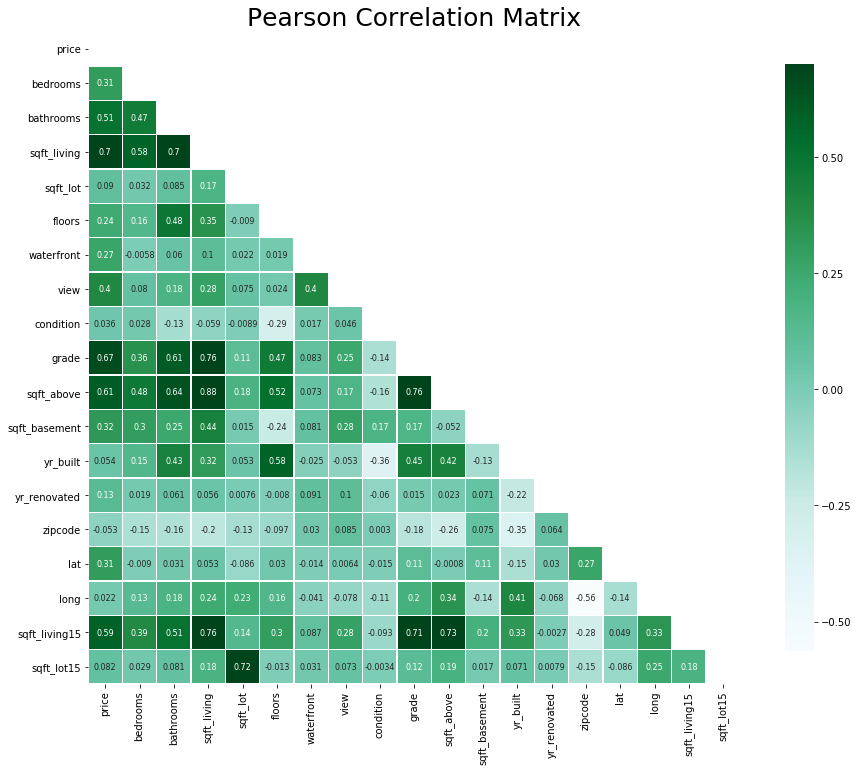

In [196]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df_hp[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df_hp[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});